In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
output = "/home/eda/Desktop/DeepSimpson/deepsimpson/output/features"
simpsons_df = pd.read_csv("/home/eda/Desktop/DeepSimpson/deepsimpson/output/features/simpsons_ed_es.csv")

##### Filter the DataFrame to include only rows where the type is "major axis"

In [5]:
# simpsons_df_filtered = simpsons_df[simpsons_df["Phase"].isin(["ED", "ED_GT"])]
simpsons_df_filtered = simpsons_df[simpsons_df["Type"] == ("Major Axis")]
simpsons_df_filtered.head()

,Filename,Phase,Frame,Start_X,Start_Y,End_X,End_Y,Frames,Type,Split,Length,EF
0,0X1002E8FBACD08477.avi,ALL,3,50.0,24.0,70.337857,70.483664,1.0,Major Axis,train,50.738146,59.101988
21,0X1002E8FBACD08477.avi,ALL,18,52.0,26.0,68.022217,64.316461,2.0,Major Axis,train,41.531466,59.101988
42,0X1002E8FBACD08477.avi,ES,26,52.0,24.0,69.276610,62.331111,3.0,Major Axis,train,42.044683,59.101988
63,0X1002E8FBACD08477.avi,ED,54,49.0,26.0,73.468867,70.341268,4.0,Major Axis,train,50.644580,59.101988
84,0X1002E8FBACD08477.avi,ES,72,55.0,27.0,68.188736,63.481332,5.0,Major Axis,train,38.792143,59.101988


##### For each video, select the last row based on the order in the DataFrame

In [6]:
last_rows_df = simpsons_df_filtered.groupby("Filename").tail(1)
last_rows_df.head()


,Filename,Phase,Frame,Start_X,Start_Y,End_X,End_Y,Frames,Type,Split,Length,EF
168,0X1002E8FBACD08477.avi,ES,187,52.0,27.0,70.286293,62.358872,9.0,Major Axis,train,39.807516,59.101988
336,0X1005D03EED19C65B.avi,ES,87,60.0,23.0,76.816384,57.521601,8.0,Major Axis,train,38.399631,62.363798
525,0X10075961BC11C88E.avi,ALL,108,57.0,26.0,62.066410,67.891161,9.0,Major Axis,train,42.196421,54.545097
693,0X100E3B8D3280BEC5.avi,ES,87,59.0,26.0,76.579514,72.687672,8.0,Major Axis,train,49.887654,36.573739
882,0X100E491B3CD58DE2.avi,ES,195,50.0,20.0,67.230789,64.710429,9.0,Major Axis,train,47.915786,33.991745


Max frame: 59.0
Min frame: 2.0
Mean frame: 8.733838786911413


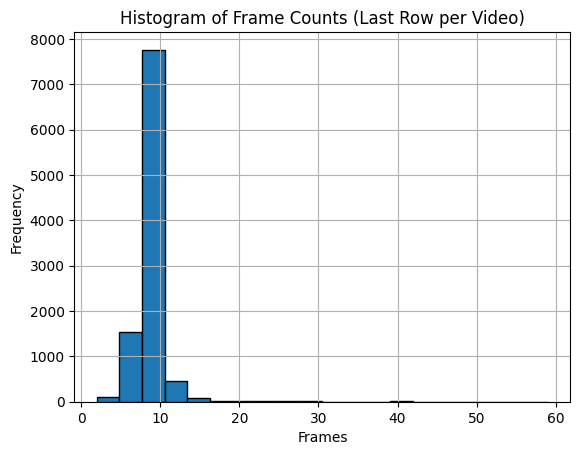

In [7]:
# Display basic statistics of the "Frames" column
print("Max frame:", last_rows_df["Frames"].max())
print("Min frame:", last_rows_df["Frames"].min())
print("Mean frame:", last_rows_df["Frames"].mean())

# Plot a histogram of the "Frames" column


plt.hist(last_rows_df["Frames"], bins=20, edgecolor='black')
plt.title("Histogram of Frame Counts (Last Row per Video)")
plt.xlabel("Frames")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [8]:
# 3. Aggregate: count Phase occurrences per video
phase_counts = (
    simpsons_df_filtered.groupby(["Filename", "Phase"])
      .size()                      # raw counts
      .unstack(fill_value=0)       # wide format, 0 where absent
      .sort_index(axis=1)          # optional: alphabetical column order
)

# 4. Inspect or save
print(phase_counts.head(15))         # first few videos


Phase                   ALL  ED  ES
Filename                           
0X100009310A3BD7FC.avi    1   3   4
0X1002E8FBACD08477.avi    2   3   4
0X1005D03EED19C65B.avi    1   3   4
0X10075961BC11C88E.avi    2   3   4
0X10094BA0A028EAC3.avi    2   4   4
0X100CF05D141FF143.avi    2   3   4
0X100E3B8D3280BEC5.avi    1   3   4
0X100E491B3CD58DE2.avi    2   3   4
0X100F044876B98F90.avi    2   3   4
0X101026B90DAE7E95.avi    2   3   4
0X1012703CDC1436FE.avi    2   3   4
0X1013E8A4864781B.avi     2   3   4
0X1018521A3BC5CDBA.avi    2   3   4
0X101C388397F66EDB.avi    2   3   4
0X101CFC9C5351DCBE.avi    2   3   4


In [9]:
video_id = "0X101CFC9C5351DCBE.avi"  # ilgilendiğin video adı

video_rows = simpsons_df_filtered[simpsons_df_filtered["Filename"] == video_id]

print(video_rows)



                    Filename Phase  Frame  Start_X  Start_Y      End_X  \
1659  0X101CFC9C5351DCBE.avi    ES     11     51.0     35.0  61.119388   
1680  0X101CFC9C5351DCBE.avi    ED     32     50.0     31.0  66.762269   
1701  0X101CFC9C5351DCBE.avi    ES     44     50.0     33.0  60.199529   
1722  0X101CFC9C5351DCBE.avi   ALL     59     58.0     33.0  65.395573   
1743  0X101CFC9C5351DCBE.avi    ED     61     59.0     31.0  65.483190   
1764  0X101CFC9C5351DCBE.avi   ALL     73     51.0     33.0  61.092273   
1785  0X101CFC9C5351DCBE.avi    ES     74     51.0     33.0  60.709140   
1806  0X101CFC9C5351DCBE.avi    ED     91     52.0     33.0  64.307487   
1827  0X101CFC9C5351DCBE.avi    ES    110     51.0     35.0  63.195047   

          End_Y  Frames        Type  Split     Length         EF  
1659  80.272333     1.0  Major Axis  train  46.389505  55.086252  
1680  85.643297     2.0  Major Axis  train  57.156483  55.086252  
1701  79.890869     3.0  Major Axis  train  47.987332  55.

In [18]:
filter_all = simpsons_df_filtered[simpsons_df_filtered["Phase"] != "ALL" ]
filter_all.head() 

,Filename,Phase,Frame,Start_X,Start_Y,End_X,End_Y,Frames,Type,Split,Length,EF
42,0X1002E8FBACD08477.avi,ES,26,52.0,24.0,69.276610,62.331111,3.0,Major Axis,train,42.044683,59.101988
63,0X1002E8FBACD08477.avi,ED,54,49.0,26.0,73.468867,70.341268,4.0,Major Axis,train,50.644580,59.101988
84,0X1002E8FBACD08477.avi,ES,72,55.0,27.0,68.188736,63.481332,5.0,Major Axis,train,38.792143,59.101988
105,0X1002E8FBACD08477.avi,ED,107,51.0,24.0,73.327182,69.993990,6.0,Major Axis,train,51.126805,59.101988
126,0X1002E8FBACD08477.avi,ES,124,57.0,26.0,68.300718,63.368963,7.0,Major Axis,train,39.040308,59.101988


In [27]:
phase_counts = (
    filter_all.groupby("Filename")["Phase"]
    .value_counts()
    .unstack(fill_value=0)
)

# Toplam kolonunu ekle (ED + ES)
phase_counts["Total"] = phase_counts.sum(axis=1)

# İlk birkaç sonucu yazdır
print(phase_counts.head())
print("Mean:")
print(phase_counts["Total"].mean())
print("Max:")
print(phase_counts["Total"].max())
print("Min:")
print(phase_counts["Total"].min())

Phase                   ED  ES  Total
Filename                             
0X100009310A3BD7FC.avi   3   4      7
0X1002E8FBACD08477.avi   3   4      7
0X1005D03EED19C65B.avi   3   4      7
0X10075961BC11C88E.avi   3   4      7
0X10094BA0A028EAC3.avi   4   4      8
Mean:
6.971847858640311
Max:
57
Min:
1


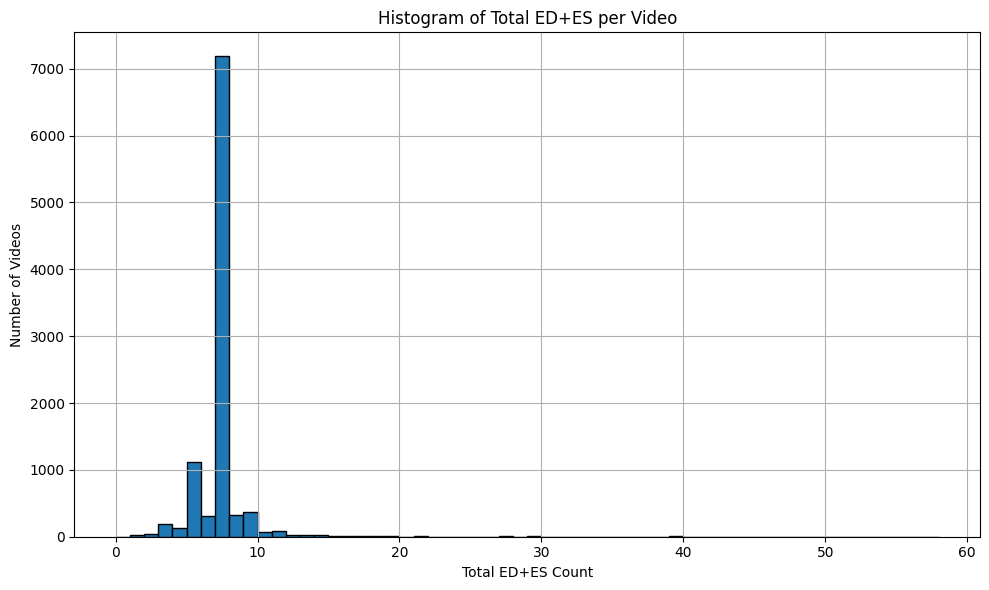

In [24]:
# Histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(phase_counts["Total"], bins=range(0, phase_counts["Total"].max() + 2), edgecolor='black')
plt.title("Histogram of Total ED+ES per Video")
plt.xlabel("Total ED+ES Count")
plt.ylabel("Number of Videos")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import numpy as np

def resample_df_pairwise(df_grp: pd.DataFrame, target: int = 16) -> pd.DataFrame:
    """
    Return a copy of `df_grp` that contains exactly `target` rows
    while preserving the ED–ES alternation pattern.

    Parameters
    ----------
    df_grp : pd.DataFrame
        All rows for a single video, already sorted chronologically.
        Must contain only ED / ES phases.
    target : int, optional
        Desired sequence length (default: 16).

    Returns
    -------
    pd.DataFrame
        DataFrame with exactly `target` rows (same columns as input).
    """
    n = len(df_grp)

    # Already the desired length → nothing to do
    if n == target:
        return df_grp.copy()

    # --------- up-sample: n < target ---------------------------------
    if n < target:
        # Repeat the whole sequence enough times, then truncate
        reps  = int(np.ceil(target / n))
        tiled = pd.concat([df_grp] * reps, ignore_index=True).iloc[:target]
        return tiled

    # --------- down-sample: n > target --------------------------------
    pair_cnt  = n // 2                 # number of ED–ES pairs
    tgt_pairs = target // 2            # pairs we need (e.g. 8 for 16)

    # Choose pair indices uniformly across the sequence
    pair_idx  = np.linspace(0, pair_cnt - 1, tgt_pairs, dtype=int)

    # Collect rows: for each selected pair take ED and ES (2*k, 2*k+1)
    take_rows = []
    for pi in pair_idx:
        take_rows.extend([2 * pi, 2 * pi + 1])

    # If target is odd, append the first ED to reach the exact length
    if len(take_rows) < target:
        take_rows.append(0)

    return df_grp.iloc[take_rows].reset_index(drop=True)


# ------------------------------------------------------------------
# Example usage on an existing DataFrame called `filter_all`
# (assumed to contain only ED / ES rows and a 'Filename' column)
# ------------------------------------------------------------------
fixed_parts = (
    filter_all
      .sort_values(["Filename", "Frame"])         # chronological within each video
      .groupby("Filename", group_keys=False)
      .apply(lambda g: resample_df_pairwise(g, target=16))
)

# Verify: every video now has exactly 16 rows
print(fixed_parts.groupby("Filename").size().head())

# Preview the first 20 rows
print("\nSample output:\n", fixed_parts.head(20))



Filename
0X100009310A3BD7FC.avi    16
0X1002E8FBACD08477.avi    16
0X1005D03EED19C65B.avi    16
0X10075961BC11C88E.avi    16
0X10094BA0A028EAC3.avi    16
dtype: int64

Sample output:
                   Filename Phase  Frame  Start_X  Start_Y      End_X  \
0   0X100009310A3BD7FC.avi    ES     22     57.0     18.0  64.121276   
1   0X100009310A3BD7FC.avi    ED     43     58.0     17.0  70.250746   
2   0X100009310A3BD7FC.avi    ES     61     59.0     19.0  63.711177   
3   0X100009310A3BD7FC.avi    ED     86     52.0     18.0  70.608952   
4   0X100009310A3BD7FC.avi    ES    102     54.0     20.0  64.562122   
5   0X100009310A3BD7FC.avi    ED    130     57.0     18.0  70.974603   
6   0X100009310A3BD7FC.avi    ES    147     53.0     18.0  63.170929   
7   0X100009310A3BD7FC.avi    ES     22     57.0     18.0  64.121276   
8   0X100009310A3BD7FC.avi    ED     43     58.0     17.0  70.250746   
9   0X100009310A3BD7FC.avi    ES     61     59.0     19.0  63.711177   
10  0X100009310A3BD7FC.a

/tmp/ipykernel_137235/3518318442.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: resample_df_pairwise(g, target=16))


In [30]:
# Step 1: Filter the rows
simpson_discs_df = simpsons_df[simpsons_df["Type"] == "Simpson's Disc"]

# Step 2: Preprocess Simpson's Disc rows into a group lookup
grouped_discs = simpson_discs_df.groupby(["Filename", "Frame"])

# Step 3: Prepare the final row list
ordered_rows = []

# Step 4: For each Major Axis row, add it and its matching discs in order
for _, major_row in fixed_parts.iterrows():
    ordered_rows.append(major_row.to_dict())  # Convert major_row to dict

    # Create the lookup key
    key = (major_row["Filename"], major_row["Frame"])

    # If there are matching Simpson's Discs, add them
    if key in grouped_discs.groups:
        matching_discs = grouped_discs.get_group(key)
        ordered_rows.extend(matching_discs.to_dict('records'))  # Already dict

# Step 5: Convert back to DataFrame
final_df = pd.DataFrame(ordered_rows).reset_index(drop=True)

In [32]:
# Convert the list of rows back to a DataFrame
final_df.head()

,Filename,Phase,Frame,Start_X,Start_Y,End_X,End_Y,Frames,Type,Split,Length,EF
0,0X100009310A3BD7FC.avi,ES,22,57.000000,18.000000,64.121276,63.334565,1.0,Major Axis,val,45.890471,78.498406
1,0X100009310A3BD7FC.avi,ES,22,59.976512,17.532442,56.771038,18.035966,NaN,Simpson's Disc,val,3.244781,78.498406
2,0X100009310A3BD7FC.avi,ES,22,61.267166,19.774607,53.940367,20.925520,NaN,Simpson's Disc,val,7.416642,78.498406
3,0X100009310A3BD7FC.avi,ES,22,62.099895,22.088705,53.857246,23.383482,NaN,Simpson's Disc,val,8.343722,78.498406
4,0X100009310A3BD7FC.avi,ES,22,63.390548,24.330870,53.774125,25.841444,NaN,Simpson's Disc,val,9.734342,78.498406


In [33]:
import os 
output_path = os.path.join(output, "fixed_frame_ed_es.csv")
# Save as csv
final_df.to_csv(output_path, index=False)

In [34]:
# Count the number of Major Axis rows per video
major_axis_counts = final_df[final_df["Type"] == "Major Axis"].groupby("Filename").size().reset_index(name="MajorAxisCount")

# Show the first few rows
print(major_axis_counts.head(100))




                  Filename  MajorAxisCount
0   0X100009310A3BD7FC.avi              16
1   0X1002E8FBACD08477.avi              16
2   0X1005D03EED19C65B.avi              16
3   0X10075961BC11C88E.avi              16
4   0X10094BA0A028EAC3.avi              16
..                     ...             ...
95  0X10FCACE551DE0CEB.avi              16
96  0X11000DD0D10B399F.avi              16
97  0X1100A0AA0BDBAE92.avi              16
98  0X1106795368C7DE44.avi              16
99  0X1108EED6EC60971E.avi              16

[100 rows x 2 columns]
